# Coupled Quantum Systems: Two Coupled Qubits

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from qutip import qeye, sigmax, sigmaz, tensor

%matplotlib inline

In [64]:
def compute(w1list, w2, g12):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2))
    sx1 = tensor(sigmax(), qeye(2))

    sz2 = tensor(qeye(2), sigmaz())
    sx2 = tensor(qeye(2), sigmax())

    idx = 0
    evals_mat = np.zeros((len(w1list), 2 * 2))

    for w1 in w1list:

        # evaluate the Hamiltonian
        H = w1 * sz1/2 + w2 * sz2/2 + g12 * sx1 * sx2

        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

        evals_mat[idx, :] = np.real(evals)

        idx += 1

    return evals_mat 

In [65]:
w1 = 1.0  # atom 1 frequency: sweep this one
w2 = 0.9  # atom 2 frequency

g12 = 0.01 # atom1-atom2 coupling strength

w1list =  np.linspace(w2*(1-0.1), w2*(1+0.1), 100) # atom 1 frequency range

In [66]:
evals_mat = compute(w1list, w2, g12)

Text(0.5, 1.0, 'Energy spectrum of two coupled qubits')

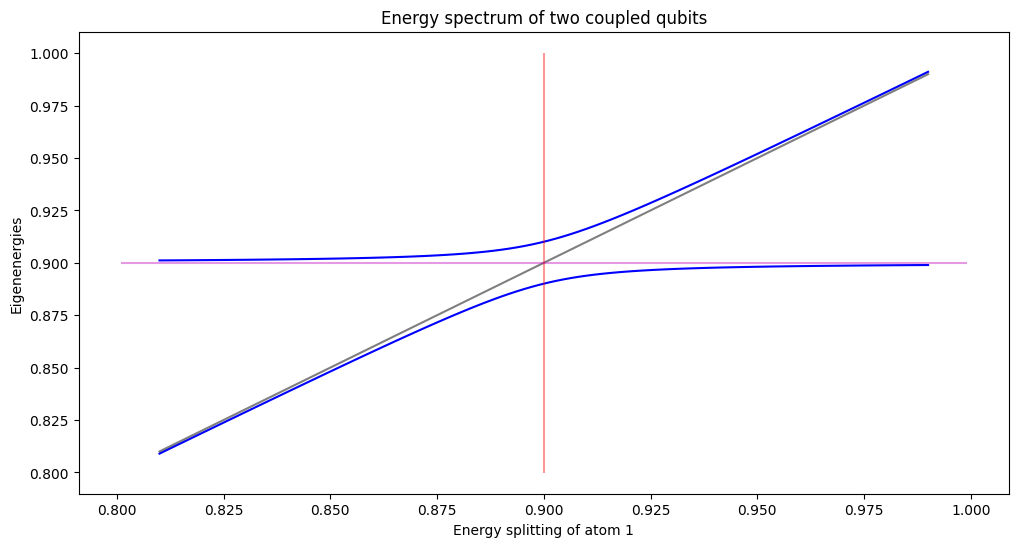

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))

evmat0 = evals_mat[:, 0]

for n in [1, 2]:
    ax.plot(w1list,
            (evals_mat[:, n] - evmat0), "b")

ax.plot(w1list, w1list, 'k-', alpha=0.5)

ymin, ymax = ax.get_ylim()
ax.vlines(w2, ymin, ymax, color='r', alpha=0.4)
xmin, xmax = ax.get_xlim()
ax.hlines(w2, xmin, xmax, color='m', alpha=0.4)

ax.set_xlabel("Energy splitting of atom 1")
ax.set_ylabel("Eigenenergies")
ax.set_title("Energy spectrum of two coupled qubits")

In [68]:
sigmax()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [69]:
sigmaz()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

## Time Evolution of Two Coupled Qubits

In [70]:
from qutip import mesolve

In [72]:
from qutip import Qobj, ket, bra

In [119]:
# list of times for which the solver should store the state vector
ts = np.linspace(0, 100, 1000)

In [74]:
psi0 = ket("10")
psi0

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [79]:
psi1 = ket("01")  # the second qubit is excited, the first one is in the ground state
psi1 

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [113]:
sz1 = tensor(sigmaz(), qeye(2))
sx1 = tensor(sigmax(), qeye(2))

sz2 = tensor(qeye(2), sigmaz())
sx2 = tensor(qeye(2), sigmax())


w1 = 1.0
w2 = 1.0
g12 = 0.02

In [114]:
# evaluate the Hamiltonian
H = w1 * sz1/2 + w2 * sz2/2 + g12 * sx1 * sx2
H

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.    0.    0.    0.02]
 [ 0.    0.    0.02  0.  ]
 [ 0.    0.02  0.    0.  ]
 [ 0.02  0.    0.   -1.  ]]

In [120]:
# numerically 'solving' Schrodinger equation
result = mesolve(H, psi0, ts, [], [])  # this objects -- result -- has a list of states for various moments of time.

In [121]:
# when we have a list in python, its first element is list[0], the last one is list[-1]
psif = result.states[-1]  # the finial state
psif

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        +0.j        ]
 [ 0.        -0.90929769j]
 [-0.41614626+0.j        ]
 [ 0.        +0.j        ]]

Let's see time evolution of the transition probability


In [122]:
probs = []
for state in result.states:
    ampl = state.dag() * psi1
    prob = np.abs(ampl) * np.abs(ampl)
    probs.append(prob)

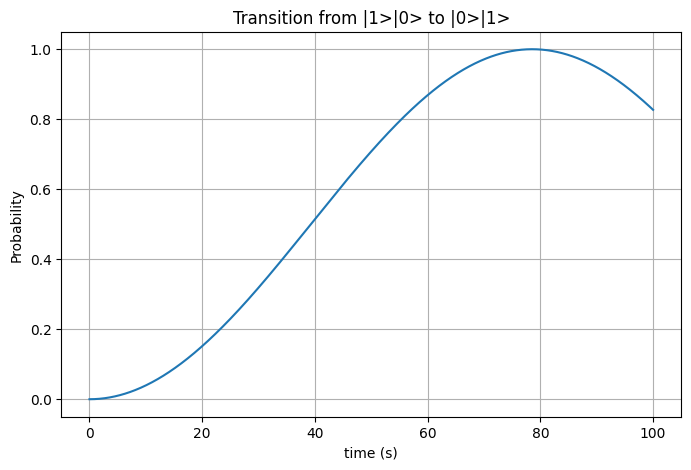

In [123]:
plt.figure(figsize=[8, 5])

plt.plot(ts, probs)

plt.xlabel("time (s)")
plt.ylabel("Probability")
plt.title("Transition from |1>|0> to |0>|1>")

plt.grid(1)

plt.show()
plt.close()